<a href="https://colab.research.google.com/github/toba717/DataScience/blob/main/CSM148_Project3_Outline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are exploring the wilderness of _Mushroomia_, a land populated by a plethora of diverse fauna and flora. In particular, _Mushroomia_ is known for its unparalleled variety in mushrooms. However, not all the mushrooms in _Mushroomia_ are edible. As you make your way through _Mushroomia_, you would like to know which mushrooms are edible, in order to forage for supplies for your daily mushroom soup.

You have access to:
* _Shroomster Pro Max <sup>TM</sup>_ - a state of the art data collection device, developed by _Mushroomia_, that allows you to collect various data points about any mushroom you encounter in the wild
* _The National Archives on Mushrooms_ - a dataset collected over the years by the government of _Mushroomia_

To address this problem, you decide to use the skills you learnt in CSM148 and train machine learning models on the _The National Archives on Mushrooms_ in order to use your _Shroomster Pro Max <sup>TM</sup>_ to determine whether the mushrooms you encounter on your adventure can be added to your daily mushroom soup.  

This project will be more unstructured than the previous two projects in order to allow you to experience how data science problems are solved in practice. There are two parts to this project: a Jupyter Notebook with your code (where you explore, visualize, process your data and train machine learning models) and a report (where you explain the various choices you make in your implementation and analyze the final performance of your models).

# 1. Loading and Viewing Data



In [10]:
# mount to google drive and retrieve files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# importing neccesary modules 
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
# download the necessary files that is stored in the google drive
train = pd.read_csv("/content/drive/MyDrive/CS148_data/project3/mushroom_train.csv", sep = ";")
test = pd.read_csv("/content/drive/MyDrive/CS148_data/project3/mushroom_test.csv", sep = ";")

In [13]:
# viewing the training data
train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [14]:
# viewing the testing data
test.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,2.50,b,NaN,k,f,a,NaN,k,8.42,...,NaN,NaN,g,NaN,w,f,f,k,g,u
1,p,3.07,b,NaN,k,f,a,NaN,n,7.24,...,NaN,NaN,n,NaN,w,f,f,k,g,a
2,p,3.30,b,NaN,n,f,a,NaN,n,10.22,...,NaN,NaN,n,NaN,w,f,f,k,g,u
3,p,3.49,b,NaN,k,f,a,NaN,k,11.00,...,NaN,NaN,n,NaN,w,f,f,k,g,a
4,p,2.79,b,NaN,n,f,a,NaN,n,6.97,...,NaN,NaN,g,NaN,w,f,f,k,g,u


# 2. Splitting Data into Features and Labels

In [15]:
# This will be the label that the model aims to predict
label = train['class']
label

0        p
1        p
2        p
3        p
4        p
        ..
50208    p
50209    p
50210    p
50211    p
50212    p
Name: class, Length: 50213, dtype: object

In [16]:
# This will be the tentative predictor variables
train_dropped = train.drop(['class'], axis = 1)
train_dropped

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50208,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
50209,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
50210,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
50211,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [17]:
# predictors for the testing dataset
test_dropped = test.drop(['class'], axis = 1)
test_dropped

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,2.50,b,NaN,k,f,a,NaN,k,8.42,2.46,NaN,NaN,g,NaN,w,f,f,k,g,u
1,3.07,b,NaN,k,f,a,NaN,n,7.24,2.41,NaN,NaN,n,NaN,w,f,f,k,g,a
2,3.30,b,NaN,n,f,a,NaN,n,10.22,2.53,NaN,NaN,n,NaN,w,f,f,k,g,u
3,3.49,b,NaN,k,f,a,NaN,k,11.00,2.81,NaN,NaN,n,NaN,w,f,f,k,g,a
4,2.79,b,NaN,n,f,a,NaN,n,6.97,2.37,NaN,NaN,g,NaN,w,f,f,k,g,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10851,52.41,o,y,y,f,p,NaN,y,5.47,25.02,NaN,k,k,NaN,NaN,f,f,NaN,d,u
10852,54.81,o,y,y,f,p,NaN,y,6.67,22.15,NaN,k,k,NaN,NaN,f,f,NaN,d,s
10853,49.95,o,y,y,f,p,NaN,y,6.43,26.35,NaN,k,n,NaN,NaN,f,f,NaN,d,u
10854,53.16,o,y,y,f,p,NaN,y,6.99,40.29,NaN,k,k,NaN,NaN,f,f,NaN,d,s


In [18]:
# the target variable for the testing data
label_test = test["class"]
print(label_test)

0        p
1        p
2        p
3        p
4        p
        ..
10851    e
10852    e
10853    e
10854    e
10855    e
Name: class, Length: 10856, dtype: object


In [19]:
# changing the labels to numeric values
label = label.map({"p":1, "e":0})
label_test = label_test.map({"p":1, "e":0})


# 3. Data Exploration, Visualization, and Data Processing

In [20]:
# view the dimensions of the training and testing data
print(train.shape)
print(test.shape)
print(train_dropped.shape)
print(test_dropped.shape)

(50213, 21)
(10856, 21)
(50213, 20)
(10856, 20)


In [21]:
# look at the type of each predictors
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50213 entries, 0 to 50212
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 50213 non-null  object 
 1   cap-diameter          50213 non-null  float64
 2   cap-shape             50213 non-null  object 
 3   cap-surface           37915 non-null  object 
 4   cap-color             50213 non-null  object 
 5   does-bruise-or-bleed  50213 non-null  object 
 6   gill-attachment       42447 non-null  object 
 7   gill-spacing          31064 non-null  object 
 8   gill-color            50213 non-null  object 
 9   stem-height           50213 non-null  float64
 10  stem-width            50213 non-null  float64
 11  stem-root             7413 non-null   object 
 12  stem-surface          19912 non-null  object 
 13  stem-color            50213 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [22]:
# view the amount of NA values in this dataset for training
train.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             12298
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          7766
gill-spacing            19149
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               42800
stem-surface            30301
stem-color                  0
veil-type               47036
veil-color              43916
has-ring                    0
ring-type                1765
spore-print-color       45681
habitat                     0
season                      0
dtype: int64

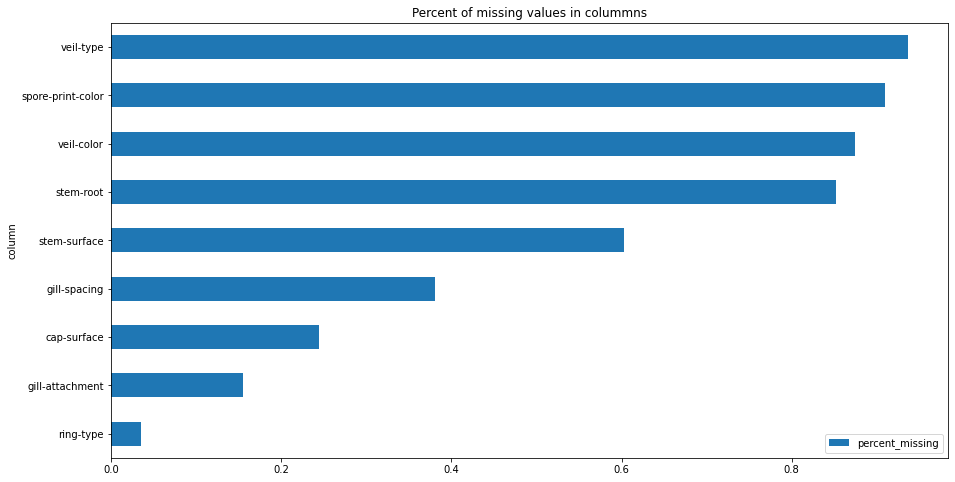

In [23]:
# Visualize the amount of missing values for each column

import pylab

def plot_missing_values(df):
    data = [(col, df[col].isnull().sum() / len(df)) 
            for col in df.columns if df[col].isnull().sum() > 0]
    col_names = ['column', 'percent_missing']
    missing_df = pd.DataFrame(data, columns=col_names).sort_values('percent_missing')
    pylab.rcParams['figure.figsize'] = (15, 8)
    missing_df.plot(kind='barh', x='column', y='percent_missing'); 
    plt.title('Percent of missing values in colummns');


plot_missing_values(train)


In [24]:
# view the amount of missing values for testing
test.isnull().sum()

# columns with missing values are the following
# missing_vals = ["cap-surface", "gill-attachment", "gill-spacing", "stem-root", "stem-surface", "veil-type", "veil-color", "ring-type", "spore-print-color"]


class                       0
cap-diameter                0
cap-shape                   0
cap-surface              1822
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          2118
gill-spacing             5914
gill-color                  0
stem-height                 0
stem-width                  0
stem-root                8738
stem-surface             7823
stem-color                  0
veil-type               10856
veil-color               9740
has-ring                    0
ring-type                 706
spore-print-color        9034
habitat                     0
season                      0
dtype: int64

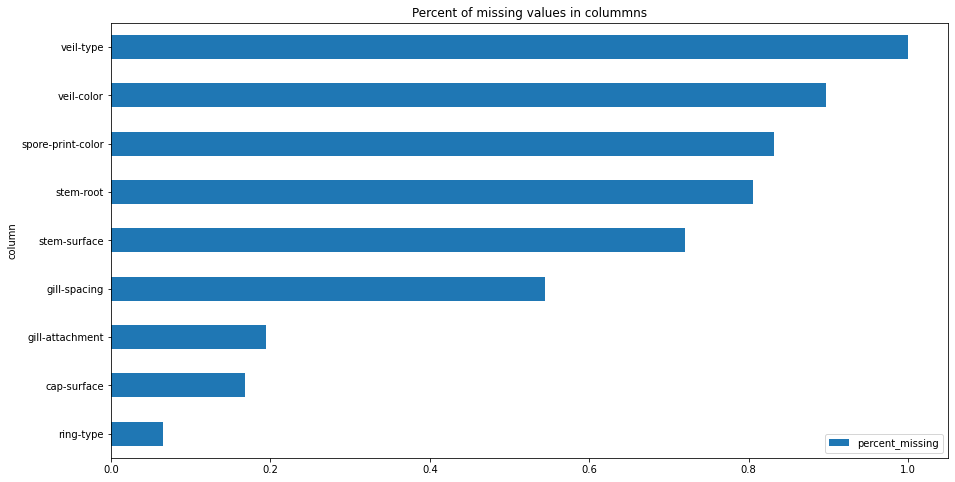

In [25]:
# Visualize the amount of missing values for each column
plot_missing_values(test)

Note that 100% of the values in the "veil-type" column is missing (there are 10856 observations in the testing data set and 10856 of them are missing values for this specific column). Thus, we have that this column does not provide us with valuable information, and can be removed from both the training and testing dataset.

In [26]:
# drop "veil-type"
train_dropped = train_dropped.drop(["veil-type"], axis = 1)
test_dropped = test_dropped.drop(["veil-type"], axis = 1)

In [27]:
# find the specifics for each of the numerical predictors
train_dropped.describe()

,cap-diameter,stem-height,stem-width
count,50213.000000,50213.000000,50213.000000
mean,6.245186,6.600561,10.763191
std,4.542552,3.221714,7.744992
min,0.380000,1.200000,0.520000
25%,3.290000,4.680000,4.720000
50%,5.540000,5.900000,9.130000
75%,8.100000,7.600000,15.210000
max,58.890000,33.920000,58.950000


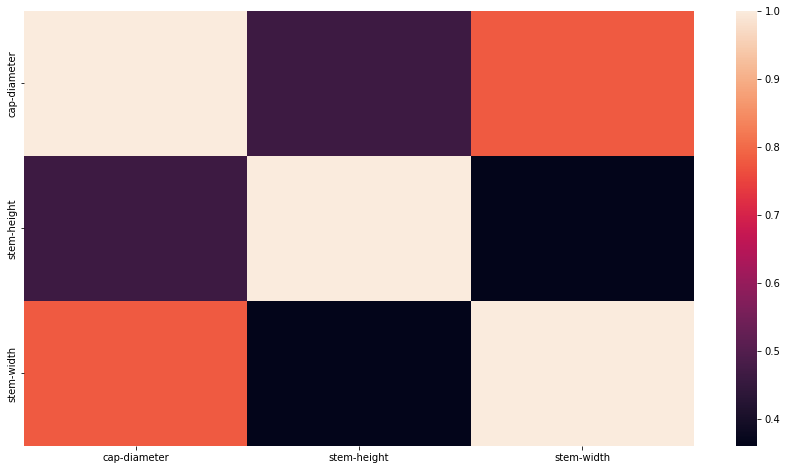

In [28]:
# find correlation of the numeric predictors
train_dropped.corr()
import seaborn as sns
sns.heatmap(train_dropped.corr())
plt.show()

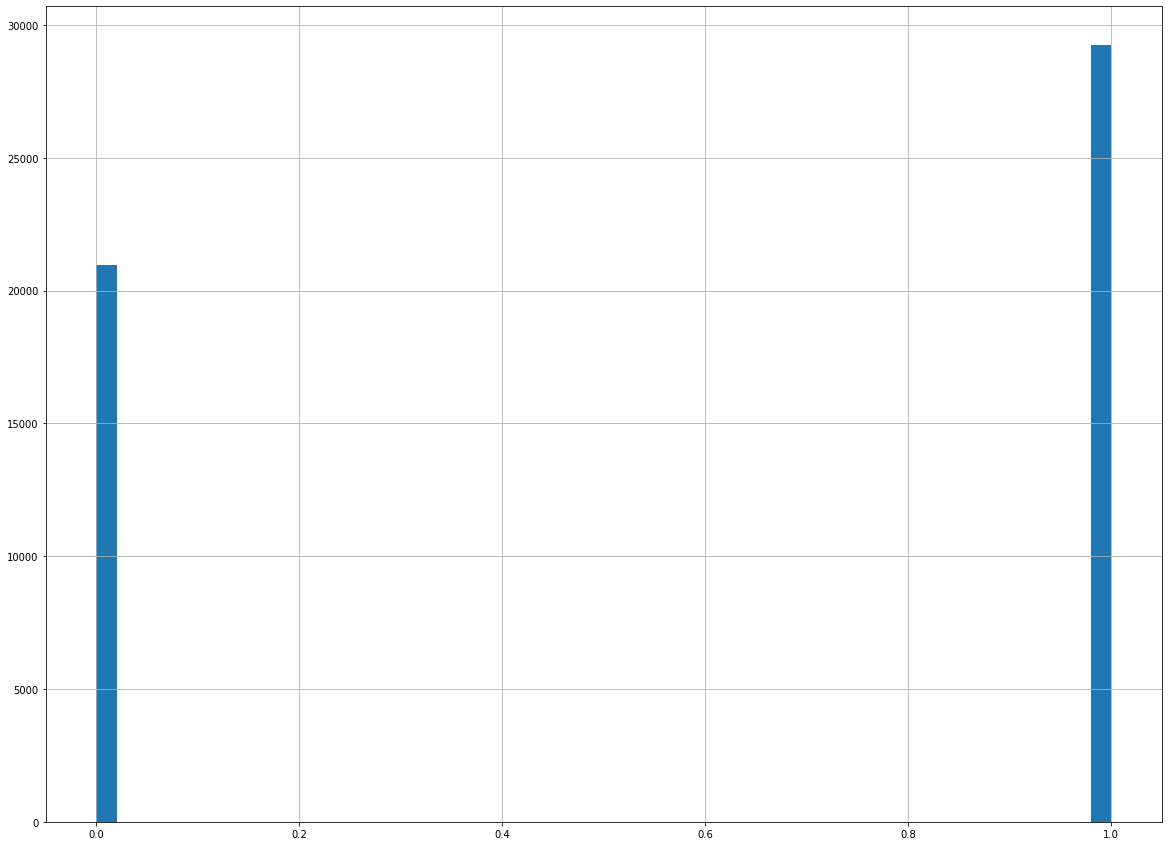

In [29]:
# visualization for the target variable
label.hist(bins = 50, figsize = (20,15))
plt.show()

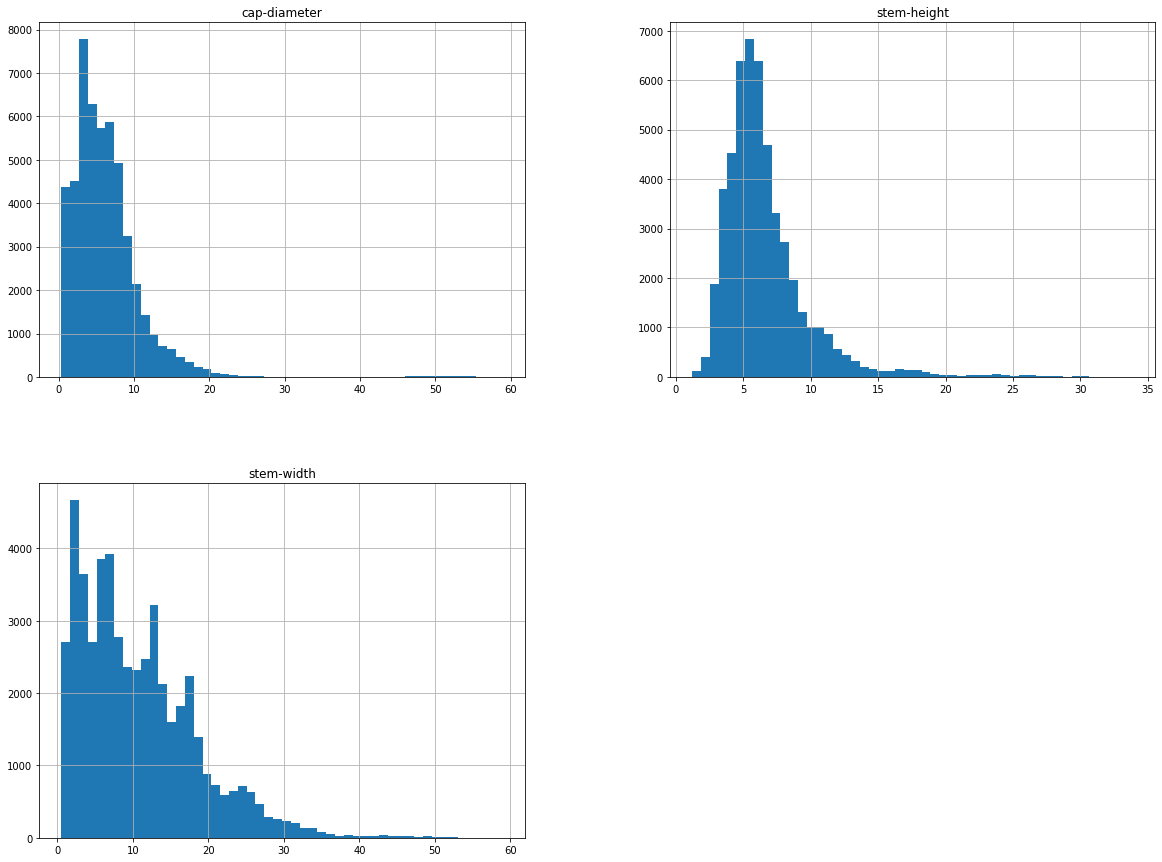

In [30]:
# visualization for numeric, predictor variables
train_dropped.hist(bins = 50, figsize = (20,15))
plt.show()

From above, we can see that there is a great amount of samples that are both poisonous and not poisonous. We can conclude that our classifier will have a sufficiently balanced dataset to adequately classify the two (i.e. there is no high skew in the two values as this can be problematic when considering accuracy rates).

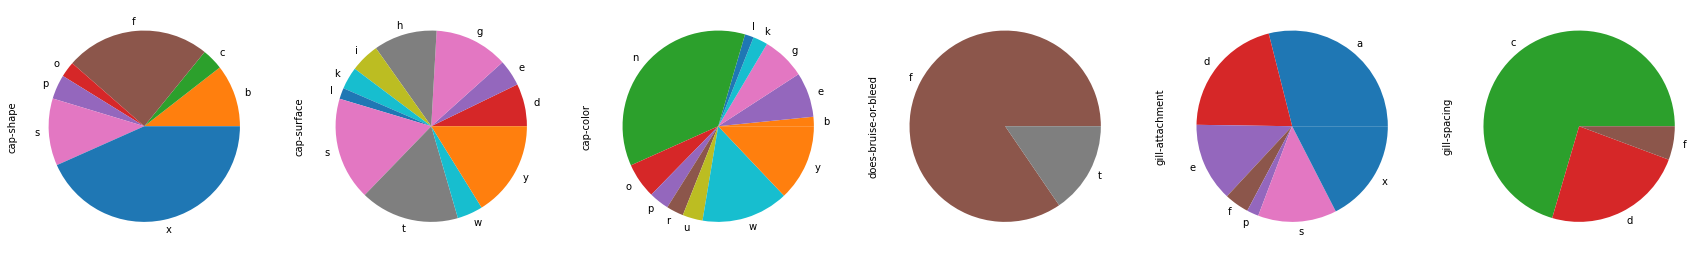

In [31]:
# visualization of the categorical variables
temp = (train_dropped.drop(["cap-diameter","stem-height","stem-width"], axis = 1)).apply(pd.value_counts).fillna(0)
temp1 = temp.iloc[:,0:6]
fig = temp1.plot(kind = 'pie',subplots = True, figsize = (30,30), legend = None)

plt.show()


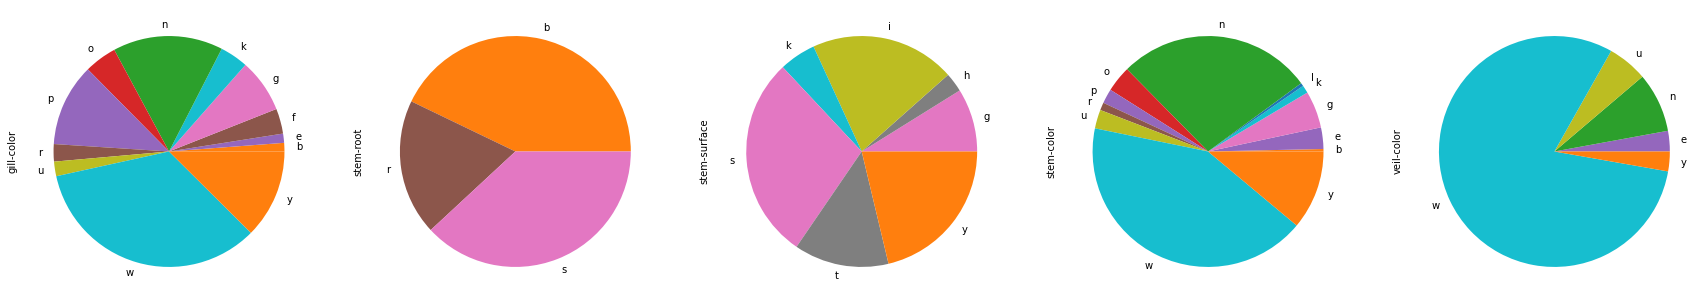

In [32]:
# next 5 predictors
temp2 = temp.iloc[:, 6:11]
fig = temp2.plot(kind = 'pie',subplots = True, figsize = (30,30), legend = None)

plt.show()

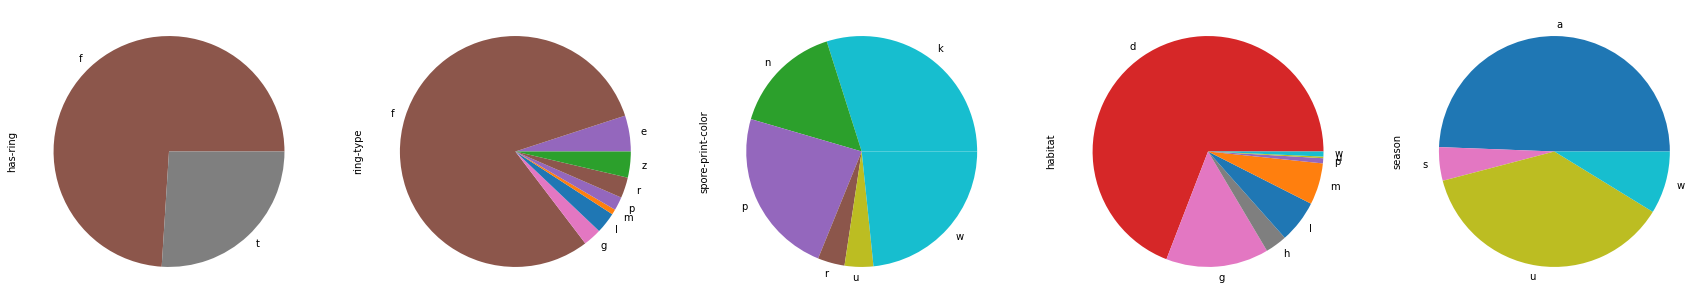

In [33]:
# next 5 predictors
temp3 = temp.iloc[:,11:]
fig = temp3.plot(kind = 'pie',subplots = True, figsize = (30,30), legend = None)

plt.show()


In [34]:
# below shows whether we should scale or encode any of the variables
for col in train_dropped:
  print(col)
  print(train_dropped[col].unique())

cap-diameter
[15.26 16.6  14.07 ... 21.8  20.42 22.71]
cap-shape
['x' 'f' 'p' 'b' 'c' 's' 'o']
cap-surface
['g' 'h' nan 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']
cap-color
['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
does-bruise-or-bleed
['f' 't']
gill-attachment
['e' nan 'a' 'd' 's' 'x' 'p' 'f']
gill-spacing
[nan 'c' 'd' 'f']
gill-color
['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
stem-height
[16.95 17.99 17.8  ... 17.7  14.62 15.15]
stem-width
[17.09 18.19 17.74 ... 21.78 21.56 22.53]
stem-root
['s' nan 'b' 'r']
stem-surface
['y' nan 's' 'k' 'i' 'h' 't' 'g']
stem-color
['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o']
veil-color
['w' 'y' nan 'n' 'e' 'u']
has-ring
['t' 'f']
ring-type
['g' 'p' 'e' 'l' 'f' 'm' nan 'r' 'z']
spore-print-color
[nan 'w' 'p' 'k' 'r' 'u' 'n']
habitat
['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']
season
['w' 'u' 'a' 's']


In [35]:
# since "stem-width" is in mm and "stem-height", "cap-diameter" are in cm, we aim to convert "stem-height" and "cap-diameter"
# if we aim to convert "stem-width", since it is a small value, we may lose precision


# for training data
train_dropped['cap-diameter'] = train_dropped['cap-diameter']*100
train_dropped['stem-height'] = train_dropped['stem-height']*100

# for testing data
test_dropped['cap-diameter'] = test_dropped['cap-diameter']*100
test_dropped['stem-height'] = test_dropped['stem-height']*100

In [36]:
# build numeric pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer

train_num = train_dropped[["cap-diameter","stem-height","stem-width"]]

num_pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

numerical_features = list(train_num)

In [37]:
# generate variable that will capture features that are used for one hot encoding
OHE = list(train_dropped.drop(["cap-diameter","stem-height","stem-width"], axis = 1))


In [38]:
# for training data
#  use to impute missing values with mode

# first store column names in variable
column_names = train_dropped.columns

# simple imputation using mode
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# fit the simple imputation strategy
imputed_train_dropped = imp.fit_transform(train_dropped)

# revert back to data frame
imputed_train_dropped = pd.DataFrame(imputed_train_dropped, columns = column_names).reset_index(drop = 'index')
imputed_train_dropped

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1526.0,x,g,o,f,e,c,w,1695.0,17.09,s,y,w,w,t,g,k,d,w
1,1660.0,x,g,o,f,e,c,w,1799.0,18.19,s,y,w,w,t,g,k,d,u
2,1407.0,x,g,o,f,e,c,w,1780.0,17.74,s,y,w,w,t,g,k,d,w
3,1417.0,f,h,e,f,e,c,w,1577.0,15.98,s,y,w,w,t,p,k,d,w
4,1464.0,x,h,o,f,e,c,w,1653.0,17.2,s,y,w,w,t,p,k,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50208,118.0,s,s,y,f,f,f,f,393.0,6.22,b,s,y,w,f,f,k,d,a
50209,127.0,f,s,y,f,f,f,f,318.0,5.43,b,s,y,w,f,f,k,d,a
50210,127.0,s,s,y,f,f,f,f,386.0,6.37,b,s,y,w,f,f,k,d,u
50211,124.0,f,s,y,f,f,f,f,356.0,5.44,b,s,y,w,f,f,k,d,u


In [39]:
# for testing data
#  use to impute missing values with mode

# first store column names in variable
column_names = test_dropped.columns

# simple imputation using mode
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# fit the simple imputation strategy
imputed_test_dropped = imp.fit_transform(test_dropped)

# revert back to data frame
imputed_test_dropped = pd.DataFrame(imputed_test_dropped, columns = column_names).reset_index(drop = 'index')
imputed_test_dropped

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,250.0,b,t,k,f,a,c,k,842.0,2.46,f,f,g,w,f,f,k,g,u
1,307.0,b,t,k,f,a,c,n,724.0,2.41,f,f,n,w,f,f,k,g,a
2,330.0,b,t,n,f,a,c,n,1022.0,2.53,f,f,n,w,f,f,k,g,u
3,349.0,b,t,k,f,a,c,k,1100.0,2.81,f,f,n,w,f,f,k,g,a
4,279.0,b,t,n,f,a,c,n,697.0,2.37,f,f,g,w,f,f,k,g,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10851,5241.0,o,y,y,f,p,c,y,547.0,25.02,f,k,k,w,f,f,k,d,u
10852,5481.0,o,y,y,f,p,c,y,667.0,22.15,f,k,k,w,f,f,k,d,s
10853,4995.0,o,y,y,f,p,c,y,643.0,26.35,f,k,n,w,f,f,k,d,u
10854,5316.0,o,y,y,f,p,c,y,699.0,40.29,f,k,k,w,f,f,k,d,s


In [40]:
# build fill pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numerical_features),
    ("cat", OneHotEncoder(categories = "auto", handle_unknown = "ignore", sparse_output = False), OHE),
])

In [41]:
# transform training data
train_prepared = full_pipeline.fit_transform(imputed_train_dropped)
print(train_prepared.shape)

(50213, 112)


In [42]:
# transform testing data
test_prepared = full_pipeline.fit_transform(imputed_test_dropped)
print(test_prepared.shape)

(10856, 87)


In [43]:
# as fit_transform outputs an np.array, we aim to convert to a df

# for training data

# we aim to retrieve column names
ohe_encoder = OneHotEncoder(categories = "auto", handle_unknown = "ignore", sparse_output = False)
X_object = (imputed_train_dropped.drop(["cap-diameter","stem-height","stem-width"], axis = 1))
ohe_encoder.fit(X_object)

# features that will be introduced through One Hot Encoding
feature_names_ohe = ohe_encoder.get_feature_names_out(OHE)
feature_names_ohe

# convert the np.array to df (this df will not have column names)
train_prepared_df = pd.DataFrame(train_prepared)

# combine numerical features and features that were OHE
features_df = numerical_features + list(feature_names_ohe)
features_df

# rename df
train_prepared_df.set_axis(features_df, axis = 1, inplace = True)

train_prepared_df.head()

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,1.984546,3.212433,0.816899,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.279537,3.535246,0.958927,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.722576,3.476271,0.900825,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.744590,2.846165,0.673579,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.848058,3.082067,0.831101,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
# for testing data

# we aim to retrieve column names
ohe_encoder = OneHotEncoder(categories = "auto", handle_unknown = "ignore", sparse_output = False)
X_object = (imputed_test_dropped.drop(["cap-diameter","stem-height","stem-width"], axis = 1))
ohe_encoder.fit(X_object)

# features that will be introduced through One Hot Encoding
feature_names_ohe = ohe_encoder.get_feature_names_out(OHE)
feature_names_ohe

# convert the np.array to df (this df will not have column names)
test_prepared_df = pd.DataFrame(test_prepared)

# combine numerical features and features that were OHE
features_df = numerical_features + list(feature_names_ohe)
features_df

# rename df
test_prepared_df.set_axis(features_df, axis = 1, inplace = True)

test_prepared_df.head()

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-surface_d,...,spore-print-color_p,spore-print-color_w,habitat_d,habitat_g,habitat_h,habitat_l,season_a,season_s,season_u,season_w
0,-0.881539,0.483594,-1.041207,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.804165,0.187381,-1.044440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.772944,0.935446,-1.036680,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.747152,1.131248,-1.018573,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.842173,0.119603,-1.047027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# 5. Data Augmentation (Creating at least 2 New Features)

#### "stem_vol" Predictor

In [45]:
# use volume of stem as a new predictor
stem_vol_train = train_prepared_df["stem-height"]*train_prepared_df["stem-width"] # training data
stem_vol_train

0        2.624232
1        3.390044
2        3.131510
3        1.917116
4        2.561510
           ...   
50208    0.486255
50209    0.731114
50210    0.482526
50211    0.648674
50212    0.713467
Length: 50213, dtype: float64

In [46]:
# adding feature to the prepared training dataframe
train_prepared_df["stem_vol"] = stem_vol_train 

In [47]:
# do the same for testing data
stem_vol_test = test_prepared_df["stem-height"]*test_prepared_df["stem-width"]
stem_vol_test

0       -0.503522
1       -0.195708
2       -0.969758
3       -1.152259
4       -0.125227
           ...   
10851   -0.107316
10852    0.010280
10853   -0.008035
10854    0.175111
10855    0.003538
Length: 10856, dtype: float64

In [48]:
# adding feature to the prepared testing dataframe
test_prepared_df["stem_vol"] = stem_vol_test

#### "diam_stem_ratio" Predictor

In [49]:
# ratio between cap-diameter and stem-width

diam_stem_ratio_train = train_prepared_df["cap-diameter"]/train_prepared_df["stem-width"] # training data
diam_stem_ratio_train

0        2.429367
1        2.377175
2        1.912222
3        2.590032
4        2.223625
           ...   
50208    1.900883
50209    1.590535
50210    1.930858
50211    1.603132
50212    1.628612
Length: 50213, dtype: float64

In [50]:
# adding feature to the prepared training dataframe
train_prepared_df["diam_stem_ratio"] = diam_stem_ratio_train

In [51]:
# do the same for testing data

diam_stem_ratio_test = test_prepared_df["cap-diameter"]/test_prepared_df["stem-width"]
diam_stem_ratio_test

0          0.846651
1          0.769948
2          0.745595
3          0.733528
4          0.804348
            ...    
10851     14.110339
10852     26.798266
10853     11.037903
10854      4.266704
10855   -284.261085
Length: 10856, dtype: float64

In [52]:
# adding feature to the prepared testing dataframe
test_prepared_df["diam_stem_ratio"] = diam_stem_ratio_test

# 6.  Logistic Regression & Statistical Hypothesis Testing

#### Logistic Regression

In [53]:
# splitting training data to have a validation set
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(train_prepared_df, label, test_size = 0.2)

In [54]:
# fit logistic regression model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 0, max_iter = 3000)
log_model_fit = log_model.fit(X_train, Y_train)
log_pred = log_model.predict(X_test)


In [55]:
# accuracy metrics of logistic regression model
from sklearn import metrics

# the accuracy of the model
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(log_pred, Y_test)))

# the precision of the model
print("%-12s %f" % ('Precision:', metrics.precision_score(log_pred, Y_test)))

# the recall score of the model
print("%-12s %f" % ('Recall Score:', metrics.recall_score(log_pred, Y_test)))

# the F1 score of the model
print("%-12s %f" % ('F1 Score:', metrics.f1_score(log_pred, Y_test)))


Accuracy:    0.859803
Precision:   0.875297
Recall Score: 0.884892
F1 Score:    0.880068


#### Statistical Hypothesis Testing

In [56]:
# the subset with 3 or more features
# define the subset to be the first three columns or the numerical features
train_prepared_df.iloc[:,0:3]

,cap-diameter,stem-height,stem-width
0,1.984546,3.212433,0.816899
1,2.279537,3.535246,0.958927
2,1.722576,3.476271,0.900825
3,1.744590,2.846165,0.673579
4,1.848058,3.082067,0.831101
...,...,...,...
50208,-1.115064,-0.828934,-0.586603
50209,-1.095251,-1.061732,-0.688605
50210,-1.095251,-0.850662,-0.567236
50211,-1.101855,-0.943781,-0.687314


In [57]:
import statsmodels.api as sm

# run to add_constant to add a constant feature to df that will serve as Y intercept
sm_x = sm.add_constant(train_prepared_df.iloc[:,0:3])

shroom_stats = sm.Logit(label, sm_x)

results_stats = shroom_stats.fit()

print(results_stats.summary())

Optimization terminated successfully.
         Current function value: 0.665016
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                50213
Model:                          Logit   Df Residuals:                    50209
Method:                           MLE   Df Model:                            3
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                 0.02134
Time:                        11:11:00   Log-Likelihood:                -33392.
converged:                       True   LL-Null:                       -34121.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3326      0.009     36.200      0.000       0.315       0.351
cap-diameter    -0.4377

# 7. Dimensionality Reduction using PCA



In [58]:
# PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [59]:
# import necessary packages
from sklearn import decomposition

In [60]:
# notice the shape of the current training set
X_train.shape

(40170, 114)

In [61]:
# we aim to decompose this through pca
# first, we decompose through singular value decomposition
# asign a value to number of components that will be utilized
pca = decomposition.PCA(n_components = 10)

pca_train = pca.fit_transform(X_train)

In [62]:
# notice that this aligns with the number of components
pca_train.shape

(40170, 10)

In [63]:
# perform logistic regression on these components
log_reg = LogisticRegression(solver = 'liblinear')
log_reg.fit(pca_train, Y_train)

LogisticRegression(solver='liblinear')

In [64]:
# now that we have our model from these components, we assess accuracy on validation data
pca_val = pca.transform(X_test)
predicted = log_reg.predict(pca_val)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(Y_test, predicted)))

Accuracy:    0.652096


In [65]:
# tells us the proportion of the total variance in the data that is explained by each PC.
print(pca.explained_variance_ratio_)

# represent the amount of variance in the data that is accounted for by each principal component
print(pca.singular_values_)


[9.77369313e-01 4.54321975e-03 2.41092619e-03 1.15340704e-03
 9.21429073e-04 8.27259717e-04 8.02206587e-04 7.76805854e-04
 6.50134638e-04 6.16988100e-04]
[4505.17409913  307.15960544  223.75574069  154.76527682  138.32898318
  131.06996021  129.07000919  127.01016319  116.19404789  113.19327435]


The accuracy has gone down when utilizing principal component analysis.

In [66]:
# Now we do the same for the testing data
pca = decomposition.PCA(n_components = 10)

pca_test = pca.fit_transform(test_prepared_df)

pca_test.shape

(10856, 10)

# 8. Experiment with any 2 other models (Non-Ensemble)

In [67]:
# Models: https://scikit-learn.org/stable/supervised_learning.html

### Model 1: Decision Trees

In [68]:
# Decision Trees

from sklearn import tree

# call the model
tree_model = tree.DecisionTreeClassifier()

# fit the model with our data
tree_fit = tree_model.fit(X_train, Y_train)

# predict using our model
tree_pred = tree_fit.predict(X_test)

# accuracy score
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(tree_pred, Y_test)))

Accuracy:    0.998208


[Text(0.5163931005141315, 0.9814814814814815, 'x[77] <= 0.5\ngini = 0.487\nsamples = 40170\nvalue = [16830, 23340]'), Text(0.2978946461397059, 0.9444444444444444, 'x[55] <= 0.5\ngini = 0.436\nsamples = 23262\nvalue = [7456, 15806]'), Text(0.22446576286764705, 0.9074074074074074, 'x[78] <= 0.5\ngini = 0.355\nsamples = 17565\nvalue = [4052, 13513]'), Text(0.21711282169117646, 0.8703703703703703, 'x[43] <= 0.5\ngini = 0.407\nsamples = 14268\nvalue = [4052, 10216]'), Text(0.16928998161764705, 0.8333333333333334, 'x[4] <= 0.5\ngini = 0.363\nsamples = 12751\nvalue = [3036, 9715]'), Text(0.11776194852941177, 0.7962962962962963, 'x[2] <= -0.712\ngini = 0.344\nsamples = 12439\nvalue = [2750, 9689]'), Text(0.03676470588235294, 0.7592592592592593, 'x[34] <= 0.5\ngini = 0.076\nsamples = 3772\nvalue = [149, 3623]'), Text(0.022058823529411766, 0.7222222222222222, 'x[92] <= 0.5\ngini = 0.012\nsamples = 3588\nvalue = [22, 3566]'), Text(0.014705882352941176, 0.6851851851851852, 'x[2] <= -0.724\ngini = 

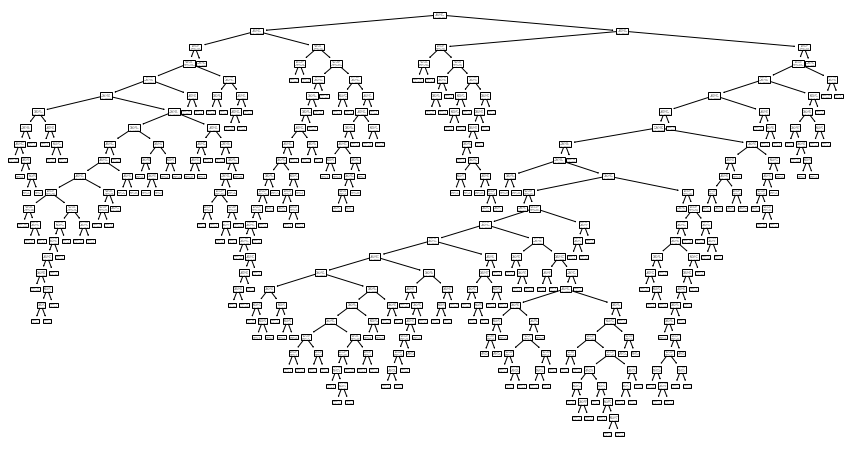

In [69]:
# overall image of decision tree
print(tree.plot_tree(tree_model))


Text(0, 0.5, 'accuracy')

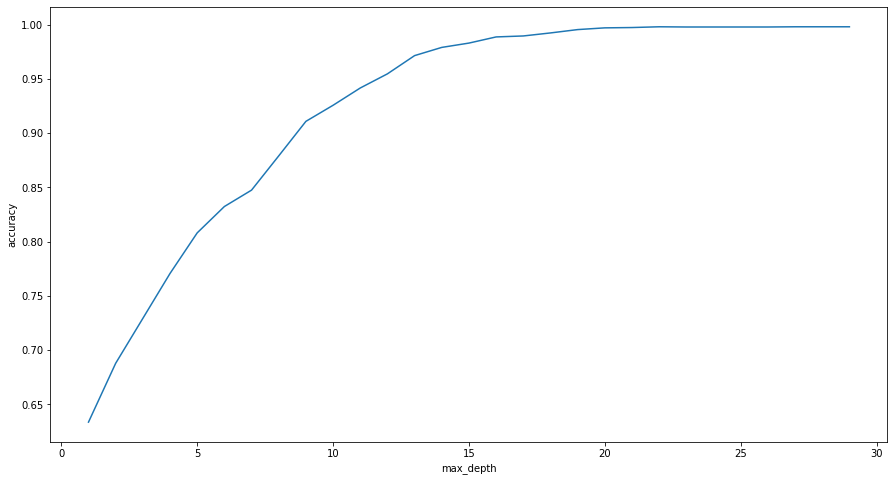

In [70]:
### pruning decision tree

# find the best max_length to use without negatively affecting the decision tree
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, Y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(metrics.accuracy_score(Y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'max_depth':pd.Series(max_depth)})

# plot to find the max_depth value when elbow occurs
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

# we should use max_depth = 15

In [71]:
# prune the decision tree by using max_depth = 15

# call the pruned model
tree_model_prune = tree.DecisionTreeClassifier(max_depth = 15)

# fit the model with our data
tree_fit_prune = tree_model_prune.fit(X_train, Y_train)

# predict using our model
tree_pred_prune = tree_fit_prune.predict(X_test)

# accuracy score of pruned model
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(tree_pred_prune, Y_test)))

Accuracy:    0.983172


[Text(0.5856309557174888, 0.96875, 'x[77] <= 0.5\ngini = 0.487\nsamples = 40170\nvalue = [16830, 23340]'), Text(0.3961427970852018, 0.90625, 'x[55] <= 0.5\ngini = 0.436\nsamples = 23262\nvalue = [7456, 15806]'), Text(0.28555913677130046, 0.84375, 'x[78] <= 0.5\ngini = 0.355\nsamples = 17565\nvalue = [4052, 13513]'), Text(0.2765905269058296, 0.78125, 'x[43] <= 0.5\ngini = 0.407\nsamples = 14268\nvalue = [4052, 10216]'), Text(0.2165779147982063, 0.71875, 'x[4] <= 0.5\ngini = 0.363\nsamples = 12751\nvalue = [3036, 9715]'), Text(0.15036434977578475, 0.65625, 'x[2] <= -0.712\ngini = 0.344\nsamples = 12439\nvalue = [2750, 9689]'), Text(0.04484304932735426, 0.59375, 'x[34] <= 0.5\ngini = 0.076\nsamples = 3772\nvalue = [149, 3623]'), Text(0.026905829596412557, 0.53125, 'x[92] <= 0.5\ngini = 0.012\nsamples = 3588\nvalue = [22, 3566]'), Text(0.017937219730941704, 0.46875, 'x[2] <= -0.724\ngini = 0.001\nsamples = 3568\nvalue = [2, 3566]'), Text(0.008968609865470852, 0.40625, 'gini = 0.0\nsamples 

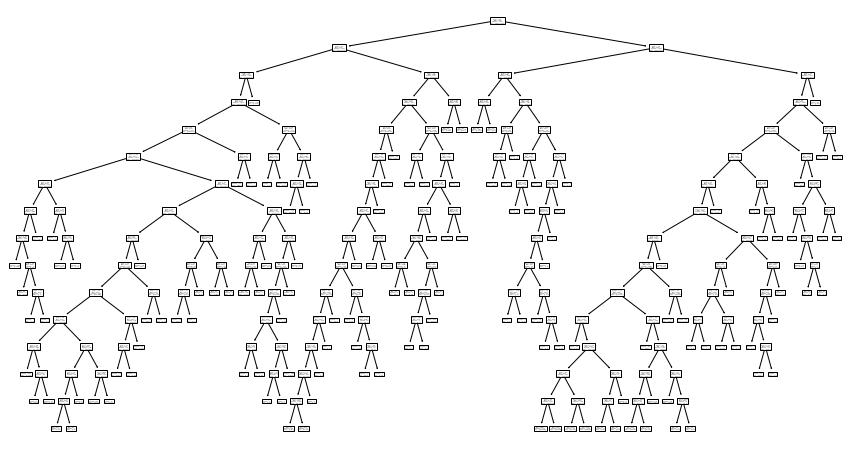

In [72]:
# overall image of the pruned decision tree
print(tree.plot_tree(tree_model_prune))


From above, we can see that the decision tree clearly became less deep. This made the model less complex. However, we noticed a drop in accuracy score after pruning the tree so there is a tradeoff between computational cost and performance.

### Model 2: Naive Bayes
#### Naive Bayes is a probabilistic machine learning model used for classification tasks. It is based on Bayes' theorem, which is a fundamental principle in probability theory that describes how to update probabilities based on new evidence. The Naive Bayes model makes some simplifying assumptions about the data, including that the features are independent of each other and that each feature contributes equally to the probability of the class.

In [73]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

G_bayes_model = GaussianNB()
G_bayes_model.fit(X_train,Y_train)

G_bayes_pred = G_bayes_model.predict(X_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(G_bayes_pred, Y_test)))

Accuracy:    0.626904


In [74]:
# Bernoulli Naive Bayes 

from sklearn.naive_bayes import BernoulliNB

B_bayes_model = BernoulliNB()

B_bayes_model.fit(X_train, Y_train)

B_bayes_pred = B_bayes_model.predict(X_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(B_bayes_pred, Y_test)))

Accuracy:    0.785024


Since the normality assumption likely does not hold in these given features, the Gaussian Naive Bayes model did not yield a very high accuracy rate. 
In contrary, the Bernoulli Naive Bayes model had provided us with a higher accuracy rate. This is because the Bernoulli Naive Bayes mdoel is most appropriate when working with binary or boolean data and in our prepared data frame, there were more features that involved binary values. 
Overall, since the data had both binary and continuous values, the Naive Bayes Model did not perform very well. Additionally, the overall model assumption that the predictors are independent could have been violated as well.

# 9. Experiment with 1 Ensemble Method

In [75]:
# Ensemble Methods: https://scikit-learn.org/stable/modules/ensemble.html


#### Random Forest

In [76]:
# import necessary packages
from sklearn.ensemble import RandomForestClassifier

# call the random forest model
forest_model = RandomForestClassifier(n_estimators = 5)

# fit the model with data
forest_model_fit = forest_model.fit(X_train, Y_train)

# predict using our model
forest_model_pred = forest_model_fit.predict(X_test)

# accuracy score
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(forest_model_pred, Y_test)))

Accuracy:    0.999502


In [77]:
# now try with n_estimators = 10

# call the random forest model
forest_model = RandomForestClassifier(n_estimators = 10)

# fit the model with data
forest_model_fit = forest_model.fit(X_train, Y_train)

# predict using our model
forest_model_pred = forest_model_fit.predict(X_test)

# accuracy score
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(forest_model_pred, Y_test)))

Accuracy:    0.999801


The accuracy has slightly gone up after tuning the number of estimators.

In [78]:
# now we experiment with the max depth

# call the random forest model
forest_model = RandomForestClassifier(n_estimators = 10, max_depth = 15)

# fit the model with data
forest_model_fit = forest_model.fit(X_train, Y_train)

# predict using our model
forest_model_pred = forest_model_fit.predict(X_test)

# accuracy score
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(forest_model_pred, Y_test)))

Accuracy:    0.994324


The accuracy has slightly gone down after manipulating the max_depth

# 10. Cross-Validation & Hyperparameter Tuning for All 3 Models

In [79]:
# Cross-Validation: https://scikit-learn.org/stable/modules/cross_validation.html
# Hyperparameter Tuning: https://scikit-learn.org/stable/modules/grid_search.html

#### Cross-Validation

In [80]:
from sklearn import model_selection
from sklearn.model_selection import KFold

# define number of splits, seed, and let data be shuffled
kfold = model_selection.KFold(n_splits = 10, random_state = 42, shuffle = True)

# call cross_val_score with argument cv = kfold to get accuracy performance score 
# of our modelon the 10 fold validation data
# other arguments: model, training_data, training labels
results = model_selection.cross_val_score(log_model, train_prepared_df, label, cv = kfold)

# print the average score for your model on the 10 folds
print("Cross Validation Accuracy: %.2f%%" % (results.mean()*100.0))

Cross Validation Accuracy: 85.68%


In [81]:
# for tree model
results = model_selection.cross_val_score(tree_model, train_prepared_df, label, cv = kfold)

# print the average score for your model on the 10 folds
print("Cross Validation Accuracy: %.2f%%" % (results.mean()*100.0))

Cross Validation Accuracy: 99.84%


In [82]:
# for pruned tree model
results = model_selection.cross_val_score(tree_model_prune, train_prepared_df, label, cv = kfold)

# print the average score for your model on the 10 folds
print("Cross Validation Accuracy: %.2f%%" % (results.mean()*100.0))

Cross Validation Accuracy: 98.31%


In [83]:
# for bayes classifier
results = model_selection.cross_val_score(B_bayes_model, train_prepared_df, label, cv = kfold)

# print the average score for your model on the 10 folds
print("Cross Validation Accuracy: %.2f%%" % (results.mean()*100.0))

Cross Validation Accuracy: 77.93%


In [84]:
# for random forest
results = model_selection.cross_val_score(forest_model, train_prepared_df, label, cv = kfold)

# print the average score for your model on the 10 folds
print("Cross Validation Accuracy: %.2f%%" % (results.mean()*100.0))

Cross Validation Accuracy: 99.43%


Hyperparameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV

#### Decision Tree Model

In [86]:
params = [{
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ["best", 'random'],
    'max_depth' : [5, 10, 20, 30]
}]

# define grid search cross validation
clf2 = model_selection.GridSearchCV(estimator = tree_model, param_grid = params, scoring = "accuracy", cv = kfold, verbose = True)

# call on the data
clf2_fit = clf2.fit(train_prepared_df, label)

# retrieve estimator which gave highest score on cross validation
best_model = clf2_fit.best_estimator_
print(best_model)

# get the mean score for your best model
print(clf2_fit.best_score_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
DecisionTreeClassifier(max_depth=30, splitter='random')
0.9995220273973169


#### Bayes Classifier

In [87]:
params = [{
    'alpha' : [0.5, 0.8, 1],
    'force_alpha' : [True, False]
}]

# define grid search cross validation
clf3 = model_selection.GridSearchCV(estimator = B_bayes_model, param_grid = params, scoring = "accuracy", cv = kfold, verbose = True)

# call on the data
clf3_fit = clf3.fit(train_prepared_df, label)

# retrieve estimator which gave highest score on cross validation
best_model = clf3_fit.best_estimator_
print(best_model)

# get the mean score for your best model
print(clf3_fit.best_score_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
BernoulliNB(alpha=0.5, force_alpha=True)
0.7793800526042316


#### Random Forest

In [94]:
params = [{
    'n_estimators' : [10, 50, 100],
    'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth' : [10, 20, 30],
    'min_samples_leaf': [1, 2, 3]
}]

# define grid search cross validation
clf4 = model_selection.GridSearchCV(estimator = forest_model, param_grid = params, scoring = "accuracy", cv = kfold, verbose = True)

# call on the data
clf4_fit = clf4.fit(train_prepared_df, label)

# retrieve estimator which gave highest score on cross validation
best_model = clf4_fit.best_estimator_
print(best_model)

# get the mean score for your best model
print(clf4_fit.best_score_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
RandomForestClassifier(max_depth=30, n_estimators=50)
0.9999203425263434


# 11. Report Final Results 

In [108]:
# Temporarily combining the training and testing, so that necessary OHE can be made
train_test_comb = imputed_train_dropped.append(imputed_test_dropped)


# as fit_transform outputs an np.array, we aim to convert to a df

# we aim to retrieve column names
ohe_encoder = OneHotEncoder(categories = "auto", handle_unknown = "ignore", sparse_output = False)
X_object = (train_test_comb.drop(["cap-diameter","stem-height","stem-width"], axis = 1))
ohe_encoder.fit(X_object)

# fit the full pipeline
train_test_comb_prepared = full_pipeline.fit_transform(train_test_comb)

# features that will be introduced through One Hot Encoding
feature_names_ohe = ohe_encoder.get_feature_names_out(OHE)

# convert the np.array to df (this df will not have column names)
train_test_comb_prepared_df = pd.DataFrame(train_test_comb_prepared)

# combine numerical features and features that were OHE
features_df = numerical_features + list(feature_names_ohe)

# rename df
train_test_comb_prepared_df.set_axis(features_df, axis = 1, inplace = True)

train_test_comb_prepared_df.head()

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,1.619462,3.076705,0.492293,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.873982,3.385311,0.601900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.393432,3.328931,0.557061,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.412426,2.726555,0.381690,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.501699,2.952075,0.503254,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [109]:
# resplit back to training and testing
train_final = train_test_comb_prepared_df.iloc[:50213, :]
test_final = train_test_comb_prepared_df.iloc[50213:, :]

#### Decision Tree

In [116]:
# model with best hyperparameter

# call the model
tree_model_best = tree.DecisionTreeClassifier(max_depth=30, splitter='random')

# fit the model with our data
tree_best_fit = tree_model_best.fit(train_final, label)

# predict using our model
tree_best_pred = tree_best_fit.predict(test_final)

In [117]:
# the accuracy of the model
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(tree_best_pred, label_test)))

# the precision of the model
print("%-12s %f" % ('Precision:', metrics.precision_score(tree_best_pred, label_test)))

# the recall score of the model
print("%-12s %f" % ('Recall Score:', metrics.recall_score(tree_best_pred, label_test)))

# the F1 score of the model
print("%-12s %f" % ('F1 Score:', metrics.f1_score(tree_best_pred, label_test)))


Accuracy:    0.432019
Precision:   0.792294
Recall Score: 0.414434
F1 Score:    0.544205


#### Bayes Classifier

In [118]:
# model with best hyperparameter

# call the bayes model
B_bayes_model_best = BernoulliNB(alpha=0.5, force_alpha=True)

# fit the best model
B_bayes_best_fit = B_bayes_model_best.fit(train_final, label)

# predict using our model
B_bayes_best_pred = B_bayes_best_fit.predict(test_final)

In [119]:
# the accuracy of the model
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(B_bayes_best_pred, label_test)))

# the precision of the model
print("%-12s %f" % ('Precision:', metrics.precision_score(B_bayes_best_pred, label_test)))

# the recall score of the model
print("%-12s %f" % ('Recall Score:', metrics.recall_score(B_bayes_best_pred, label_test)))

# the F1 score of the model
print("%-12s %f" % ('F1 Score:', metrics.f1_score(B_bayes_best_pred, label_test)))


Accuracy:    0.498066
Precision:   1.000000
Recall Score: 0.460228
F1 Score:    0.630351


#### Random Forest Classification

In [120]:
# model with best hyperparameter

# call the random forest model
forest_model_best = RandomForestClassifier(max_depth=30, n_estimators=50)

# fit the model with data
forest_model_best_fit = forest_model_best.fit(train_final, label)

# predict using our model
forest_model_best_pred = forest_model_best_fit.predict(test_final)

In [121]:
# the accuracy of the model
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(forest_model_best_pred, label_test)))

# the precision of the model
print("%-12s %f" % ('Precision:', metrics.precision_score(forest_model_best_pred, label_test)))
-
# the recall score of the model
print("%-12s %f" % ('Recall Score:', metrics.recall_score(forest_model_best_pred, label_test)))

# the F1 score of the model
print("%-12s %f" % ('F1 Score:', metrics.f1_score(forest_model_best_pred, label_test)))


Accuracy:    0.459285
Precision:   0.956522
Recall Score: 0.439478
F1 Score:    0.602250
